In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# 3 nós
# filename = 'output_07f7d2d5-75dc-431b-9103-69daa4facde7.csv'
# 4 nós
# filename = 'output_ca512203-7fbd-4c47-818f-e7c784ef2b26.csv'
# 5 nós
# filename = 'output_88f9beaf-ab62-4735-b801-6c5708748f70.csv'
# 6 nós
filename = 'output_89c8f061-c370-4c8f-a978-704908eb3aee.csv'

In [6]:
df = pd.read_csv(f'../script/outputs/{filename}', index_col=0)

In [7]:
# Cada coluna é uma query, cada linha sequência de iterações completas
df.head()

,"SELECT IN_AMPLIADA_24, ST_CONCLUSAO FROM ENEM WHERE TP_LINGUA = 1 LIMIT 10","SELECT UF_ESC_CENSO, TP_LOCALIZACAO_ESC, IN_MOBILIARIO_OBESO, Q022 FROM ENEM WHERE IN_PRESENCA_MT = 0 LIMIT 10","SELECT IN_SEM_RECURSO, TX_GABARITO_MT FROM ENEM WHERE CO_UF_ESC = 0 LIMIT 10",SELECT TP_PRESENCA_LC FROM ENEM WHERE IN_OUTRA_DEF = 0 LIMIT 10,SELECT TP_LOCALIZACAO_ESC FROM ENEM WHERE NU_ANO = 2013 LIMIT 10,"SELECT CO_MUNICIPIO_ESC, IN_SOROBAN, TP_SIT_FUNC_ESC, Q017, NO_MUNICIPIO_ESC, IN_QSE, NO_MUNICIPIO_NASCIMENTO, IN_BRAILLE FROM ENEM WHERE TX_GABARITO_CN = '0' LIMIT 10",SELECT IN_PRESENCA_CN FROM ENEM WHERE IN_LACTANTE = 0 LIMIT 10,"SELECT IN_MAQUINA_BRAILE, NU_NT_CN FROM ENEM WHERE IN_DEFICIENCIA_AUDITIVA = 0 LIMIT 10",SELECT CO_MUNICIPIO_PROVA FROM ENEM WHERE TP_SIT_FUNC_ESC = 0 LIMIT 10,SELECT TP_PRESENCA_LC FROM ENEM WHERE TP_ST_CONCLUSAO = 3 LIMIT 10,...,"SELECT NU_NOTA_COMP2, IN_UNIDADE_HOSPITALAR, TX_GABARITO_CN, IN_LIBRAS, IN_MARCA_PASSO, TX_GABARITO_MT, IN_CERTIFICADO, IN_GESTANTE FROM ENEM WHERE IN_PRESENCA_CN = 0 LIMIT 10","SELECT Q018, IN_ACESSO FROM ENEM WHERE NU_NOTA_COMP2 = 0.0 LIMIT 10",SELECT IN_MARCA_PASSO FROM ENEM WHERE IN_LACTANTE = 0 LIMIT 10,SELECT IN_BAIXA_VISAO FROM ENEM WHERE IN_OUTRA_DEF = 0 LIMIT 10,SELECT UF_INSC FROM ENEM WHERE ID_LOCALIZACAO_ESC = 1 LIMIT 10,SELECT NU_NT_CH FROM ENEM WHERE IN_MOBILIARIO_ESPECIFICO = 0 LIMIT 10,"SELECT IN_PRESENCA_CH, NU_NOTA_COMP2 FROM ENEM WHERE CO_MUNICIPIO_ESC = 0 LIMIT 10",SELECT TX_GABARITO_CN FROM ENEM WHERE IN_DEFICIENCIA_MENTAL = 0 LIMIT 10,"SELECT TX_GABARITO_LC, IN_QSE FROM ENEM WHERE TX_RESPOSTAS_MT = '.............................................' LIMIT 10",SELECT IN_GUIA_INTERPRETE FROM ENEM WHERE IN_AMPLIADA_18 = 0 LIMIT 10
1,0.004282,0.076766,0.084319,0.003810,0.091951,0.078378,0.005342,0.003710,0.066709,0.004582,...,0.124830,0.085856,0.004080,0.005093,0.079864,0.002777,0.086786,0.003405,0.006031,0.005259
2,0.004191,0.088258,0.090886,0.004215,0.105976,0.096897,0.004196,0.003860,0.096112,0.004498,...,0.063803,0.062856,0.004337,0.003398,0.058161,0.004473,0.084262,0.003136,0.006515,0.004085
3,0.002797,0.065227,0.068645,0.003165,0.070854,0.072156,0.002613,0.003834,0.064796,0.004214,...,0.066308,0.080184,0.004362,0.003730,0.069039,0.004928,0.075118,0.005242,0.006580,0.002992
4,0.003737,0.088030,0.069120,0.004741,0.069507,0.091620,0.004420,0.003707,0.099896,0.005133,...,0.102322,0.084021,0.002913,0.004382,0.076264,0.004323,0.072511,0.003747,0.006104,0.004133
5,0.003774,0.129267,0.080576,0.004019,0.084121,0.097307,0.003874,0.003688,0.076722,0.004260,...,0.080134,0.082596,0.004414,0.003699,0.073565,0.003887,0.094824,0.002802,0.007864,0.003987


In [8]:
# Cada coluna é uma sequência de iterações completas, cada linha uma query
df_t = df.T

In [9]:
df_t.head()

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
"SELECT IN_AMPLIADA_24, ST_CONCLUSAO FROM ENEM WHERE TP_LINGUA = 1 LIMIT 10",0.004282,0.004191,0.002797,0.003737,0.003774,0.003641,0.005655,0.003166,0.002508,0.004018,...,0.003486,0.004540,0.002461,0.003648,0.003825,0.003855,0.004261,0.004458,0.002850,0.004551
"SELECT UF_ESC_CENSO, TP_LOCALIZACAO_ESC, IN_MOBILIARIO_OBESO, Q022 FROM ENEM WHERE IN_PRESENCA_MT = 0 LIMIT 10",0.076766,0.088258,0.065227,0.088030,0.129267,0.081933,0.123480,0.079862,0.093610,0.094249,...,0.070225,0.090826,0.078463,0.064865,0.107061,0.094070,0.065500,0.068042,0.100184,0.076939
"SELECT IN_SEM_RECURSO, TX_GABARITO_MT FROM ENEM WHERE CO_UF_ESC = 0 LIMIT 10",0.084319,0.090886,0.068645,0.069120,0.080576,0.088665,0.113774,0.066885,0.078032,0.119569,...,0.092554,0.072204,0.065259,0.061339,0.102620,0.070336,0.061904,0.065845,0.104143,0.098716
SELECT TP_PRESENCA_LC FROM ENEM WHERE IN_OUTRA_DEF = 0 LIMIT 10,0.003810,0.004215,0.003165,0.004741,0.004019,0.002748,0.004320,0.003592,0.003407,0.005095,...,0.004489,0.003594,0.004477,0.003479,0.003524,0.002659,0.003938,0.004219,0.003329,0.004491
SELECT TP_LOCALIZACAO_ESC FROM ENEM WHERE NU_ANO = 2013 LIMIT 10,0.091951,0.105976,0.070854,0.069507,0.084121,0.116235,0.074861,0.061387,0.081687,0.082507,...,0.066602,0.112544,0.073963,0.069196,0.129686,0.067262,0.061723,0.118852,0.077090,0.069725


# Stats

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Columns: 127 entries, SELECT IN_AMPLIADA_24, ST_CONCLUSAO FROM ENEM WHERE TP_LINGUA = 1 LIMIT 10 to SELECT IN_GUIA_INTERPRETE FROM ENEM WHERE IN_AMPLIADA_18 = 0 LIMIT 10
dtypes: float64(127)
memory usage: 1.0 MB


In [11]:
df_descibe = df.describe()
df_descibe

,"SELECT IN_AMPLIADA_24, ST_CONCLUSAO FROM ENEM WHERE TP_LINGUA = 1 LIMIT 10","SELECT UF_ESC_CENSO, TP_LOCALIZACAO_ESC, IN_MOBILIARIO_OBESO, Q022 FROM ENEM WHERE IN_PRESENCA_MT = 0 LIMIT 10","SELECT IN_SEM_RECURSO, TX_GABARITO_MT FROM ENEM WHERE CO_UF_ESC = 0 LIMIT 10",SELECT TP_PRESENCA_LC FROM ENEM WHERE IN_OUTRA_DEF = 0 LIMIT 10,SELECT TP_LOCALIZACAO_ESC FROM ENEM WHERE NU_ANO = 2013 LIMIT 10,"SELECT CO_MUNICIPIO_ESC, IN_SOROBAN, TP_SIT_FUNC_ESC, Q017, NO_MUNICIPIO_ESC, IN_QSE, NO_MUNICIPIO_NASCIMENTO, IN_BRAILLE FROM ENEM WHERE TX_GABARITO_CN = '0' LIMIT 10",SELECT IN_PRESENCA_CN FROM ENEM WHERE IN_LACTANTE = 0 LIMIT 10,"SELECT IN_MAQUINA_BRAILE, NU_NT_CN FROM ENEM WHERE IN_DEFICIENCIA_AUDITIVA = 0 LIMIT 10",SELECT CO_MUNICIPIO_PROVA FROM ENEM WHERE TP_SIT_FUNC_ESC = 0 LIMIT 10,SELECT TP_PRESENCA_LC FROM ENEM WHERE TP_ST_CONCLUSAO = 3 LIMIT 10,...,"SELECT NU_NOTA_COMP2, IN_UNIDADE_HOSPITALAR, TX_GABARITO_CN, IN_LIBRAS, IN_MARCA_PASSO, TX_GABARITO_MT, IN_CERTIFICADO, IN_GESTANTE FROM ENEM WHERE IN_PRESENCA_CN = 0 LIMIT 10","SELECT Q018, IN_ACESSO FROM ENEM WHERE NU_NOTA_COMP2 = 0.0 LIMIT 10",SELECT IN_MARCA_PASSO FROM ENEM WHERE IN_LACTANTE = 0 LIMIT 10,SELECT IN_BAIXA_VISAO FROM ENEM WHERE IN_OUTRA_DEF = 0 LIMIT 10,SELECT UF_INSC FROM ENEM WHERE ID_LOCALIZACAO_ESC = 1 LIMIT 10,SELECT NU_NT_CH FROM ENEM WHERE IN_MOBILIARIO_ESPECIFICO = 0 LIMIT 10,"SELECT IN_PRESENCA_CH, NU_NOTA_COMP2 FROM ENEM WHERE CO_MUNICIPIO_ESC = 0 LIMIT 10",SELECT TX_GABARITO_CN FROM ENEM WHERE IN_DEFICIENCIA_MENTAL = 0 LIMIT 10,"SELECT TX_GABARITO_LC, IN_QSE FROM ENEM WHERE TX_RESPOSTAS_MT = '.............................................' LIMIT 10",SELECT IN_GUIA_INTERPRETE FROM ENEM WHERE IN_AMPLIADA_18 = 0 LIMIT 10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.003821,0.083014,0.083068,0.003939,0.082601,0.084379,0.003872,0.003712,0.082899,0.004041,...,0.083204,0.084890,0.003843,0.003669,0.082360,0.003892,0.081573,0.003926,0.007481,0.004152
std,0.001074,0.020535,0.028657,0.001314,0.018296,0.018314,0.001362,0.001211,0.018883,0.001749,...,0.018263,0.019439,0.000867,0.000916,0.017544,0.001647,0.017536,0.001386,0.004786,0.002020
min,0.002365,0.056892,0.059187,0.002571,0.058341,0.059095,0.002584,0.002414,0.058423,0.002660,...,0.058359,0.060931,0.002618,0.002439,0.057410,0.002568,0.057409,0.002578,0.003803,0.002461
25%,0.003354,0.068261,0.068235,0.003397,0.068605,0.069833,0.003314,0.003223,0.068794,0.003445,...,0.068839,0.069658,0.003374,0.003258,0.068611,0.003374,0.067600,0.003397,0.005541,0.003590
50%,0.003749,0.078398,0.076789,0.003827,0.078658,0.079582,0.003737,0.003601,0.078247,0.003866,...,0.078315,0.079547,0.003787,0.003610,0.077711,0.003762,0.077007,0.003827,0.006464,0.003965
75%,0.004137,0.092192,0.090815,0.004223,0.091136,0.092759,0.004172,0.004016,0.091987,0.004305,...,0.092858,0.095398,0.004165,0.003989,0.091682,0.004173,0.090335,0.004248,0.007757,0.004205
max,0.020916,0.359368,0.754230,0.023168,0.184080,0.164621,0.025496,0.022449,0.217048,0.035589,...,0.173203,0.192489,0.012027,0.020999,0.165873,0.040407,0.170101,0.026549,0.087940,0.034306


In [12]:
n_queries = len(df.columns)
n_queries

127

In [13]:
df_t_descibe = df_t.describe()
df_t_descibe

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.045198,0.041700,0.039419,0.041528,0.042127,0.041391,0.043401,0.042301,0.042447,0.041949,...,0.042501,0.040951,0.040526,0.040190,0.043785,0.041090,0.040749,0.042309,0.042547,0.041741
std,0.045855,0.041829,0.038601,0.040984,0.041861,0.041076,0.043429,0.041614,0.042268,0.042503,...,0.041998,0.040418,0.040144,0.041207,0.044588,0.040698,0.040980,0.042089,0.042714,0.040663
min,0.002450,0.002383,0.002442,0.002651,0.002728,0.002627,0.002452,0.002420,0.002402,0.002451,...,0.002451,0.002417,0.002457,0.002441,0.002365,0.002622,0.002500,0.002669,0.002533,0.002590
25%,0.004050,0.003994,0.003853,0.004191,0.003881,0.003825,0.003963,0.003946,0.003754,0.003841,...,0.003951,0.003694,0.003879,0.003683,0.003730,0.003780,0.003601,0.003973,0.003873,0.003846
50%,0.006861,0.006250,0.006453,0.006562,0.007583,0.006463,0.007556,0.006759,0.005656,0.006063,...,0.007228,0.006200,0.006046,0.005183,0.006602,0.007950,0.006342,0.005557,0.006690,0.006594
75%,0.081164,0.076393,0.072436,0.076013,0.078899,0.073443,0.078636,0.079414,0.082266,0.077104,...,0.078865,0.077912,0.077186,0.070577,0.079712,0.075383,0.072917,0.077469,0.077051,0.078502
max,0.192044,0.156331,0.143063,0.128788,0.149172,0.116790,0.143720,0.150882,0.138729,0.140304,...,0.131270,0.116165,0.129948,0.153428,0.136570,0.135755,0.124712,0.118852,0.172953,0.117474


In [14]:
mean_list = df_t_descibe.iloc[1, :]
mean_list

1       0.045198
2       0.041700
3       0.039419
4       0.041528
5       0.042127
          ...   
996     0.041090
997     0.040749
998     0.042309
999     0.042547
1000    0.041741
Name: mean, Length: 1000, dtype: float64

# Plots

In [15]:
def plot_hist_kde(df, output_file, xlim=None):
    plt.figure(figsize=(7,7))

    sns.histplot(df,
                 stat='density')

    df.plot(kind='kde',
                      style='r--')

    plt.title(f"KDE e Histograma para tempo médio de execução por iteração\nTotal de {mean_size} iterações com {n_queries} consultas diferentes cada",
              fontdict={'size': 16},
              wrap=True)
    plt.legend(['KDE', "Histograma"])
    plt.xlabel('Tempo médio de execução (ms)', 
               fontdict={'size': 14})
    plt.ylabel('Densidade', fontdict={'size': 14})

    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    if xlim:
        plt.xlim(xlim)
    plt.savefig(f'{output_file}_histplot.png', dpi=300)
        
    plt.show()

In [16]:
def plot_boxplot(df, output_file):
    plt.figure(figsize=(7,7))

    bp = sns.boxplot(df, 
                     showmeans=True, 
                     meanprops={"marker": "o", "markeredgecolor": "black", "markersize": "12", "markerfacecolor":"white"}, 
                     linewidth=2.5)

    plt.title(f"Boxplot para tempo médio de execução por iteração\nTotal de {mean_size} iterações com {n_queries} consultas diferentes cada",
              fontdict={'size': 16}, 
              wrap=True)
    plt.xlabel('Tempo médio de execução (ms)', 
               fontdict={'size': 14})

    plt.tick_params(axis='x', labelsize=12)
    plt.savefig(f'{output_file}_boxplot.png', dpi=300)

    plt.show()

In [17]:
def scatter_plot(df, output_file, xlim=None):
    plt.figure(figsize=(12,7))

    plt.scatter(df.index, df)

    plt.title(f"Tempo de execução médio por iteração\nTotal de {mean_size} iterações com {n_queries} consultas diferentes cada",
              fontdict={'size': 16},
              wrap=True)
#     plt.legend(['KDE', "Histograma"])
    plt.xlabel('Número de Iterações', 
               fontdict={'size': 14})
    plt.ylabel('Tempo médio de execução (ms)', 
               fontdict={'size': 14})

    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    if xlim:
        plt.xlim(xlim)
    plt.savefig(f'{output_file}_scatterplot.png', dpi=300)

    plt.show()

In [18]:
mean_list = mean_list*1000

In [19]:
mean_size = len(mean_list)
mean_size

1000

## 3 nós, 2019,2018

In [181]:
filename = '3nos_20192018'

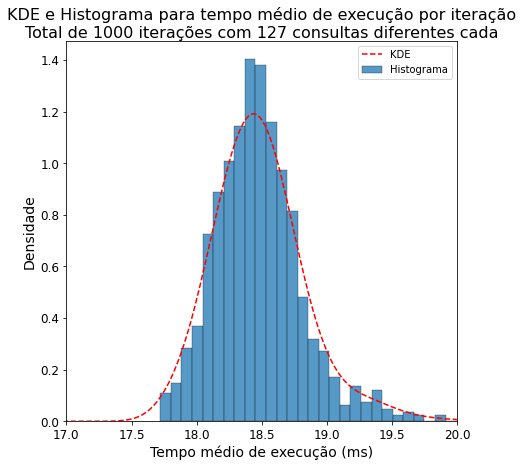

In [182]:
plot_hist_kde(mean_list, filename, [17, 20])

/home/leothi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


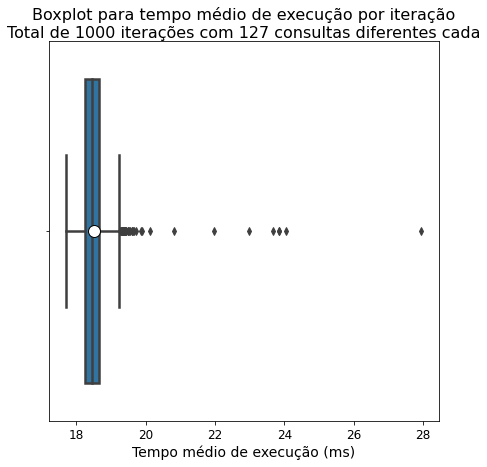

In [184]:
plot_boxplot(mean_list, filename)

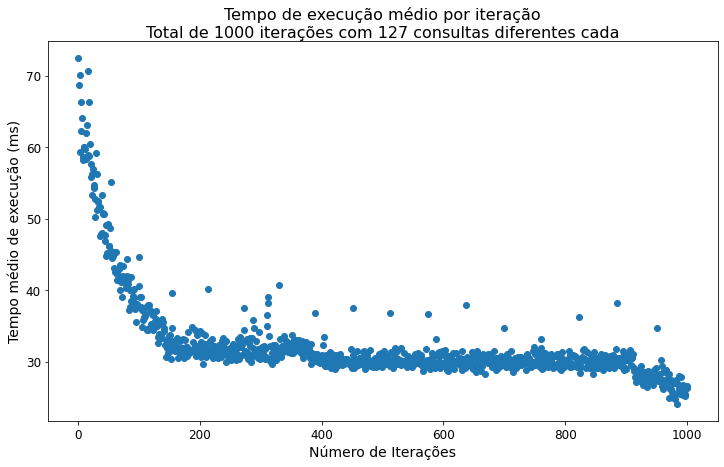

In [18]:
scatter_plot(mean_list, filename)

## 4 nós, 2019,2018

In [261]:
filename = '4nos_20192018'

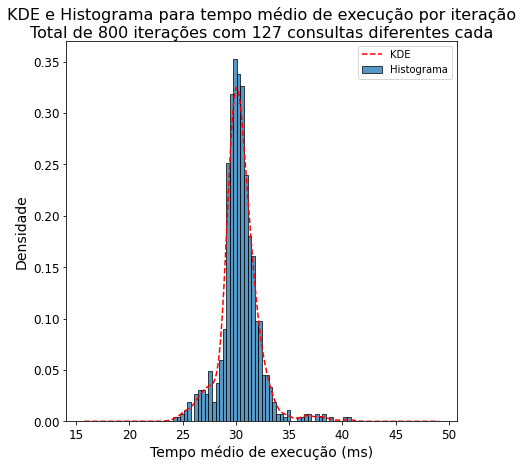

In [242]:
plot_hist_kde(mean_list, filename)

/home/leothi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


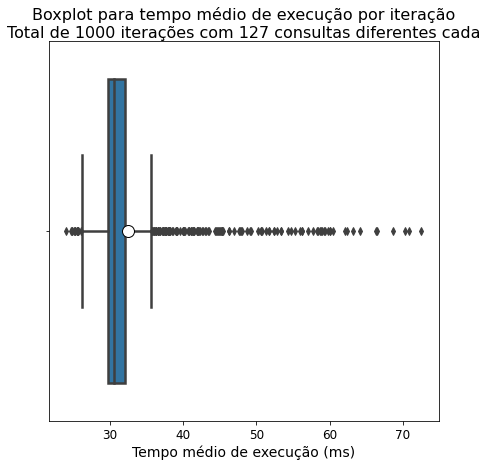

In [262]:
plot_boxplot(mean_list, filename)

In [1]:
scatter_plot(mean_list, filename)

NameError: name 'scatter_plot' is not defined

## 5 nós, 2019,2018

In [220]:
filename = '5nos_20192018'

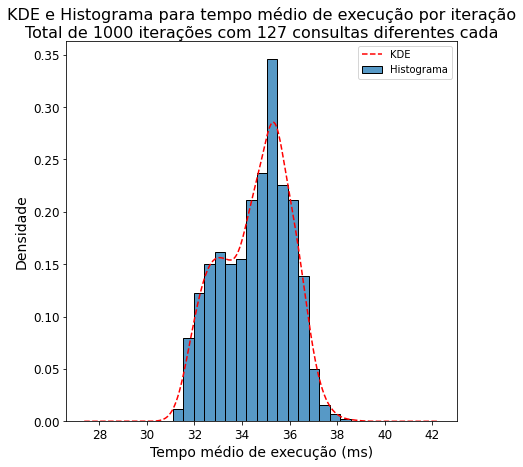

In [222]:
plot_hist_kde(mean_list, filename)

/home/leothi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


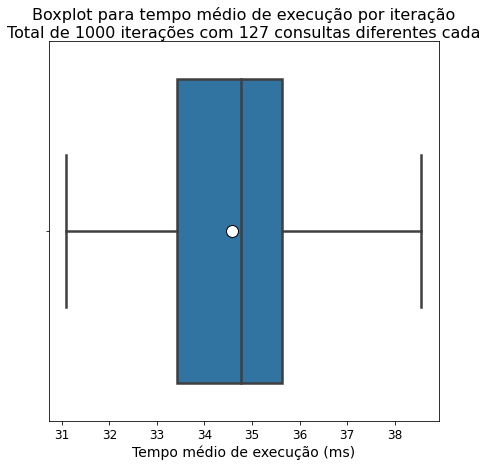

In [223]:
plot_boxplot(mean_list, filename)

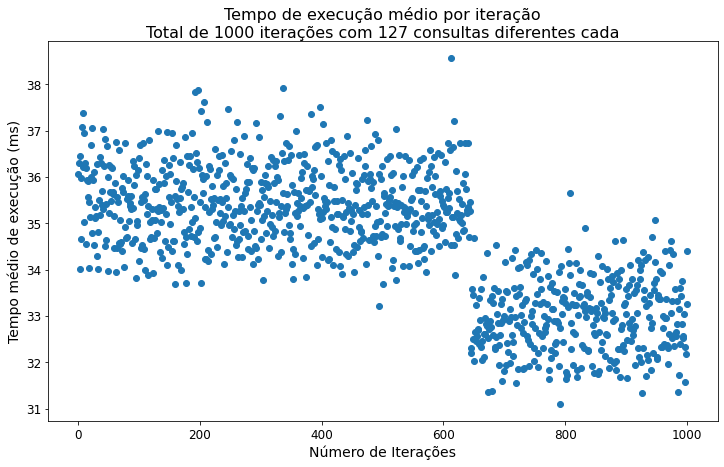

In [224]:
scatter_plot(mean_list, filename)

## 6 nós, 2019,2018

In [20]:
filename = '6nos_20192018'

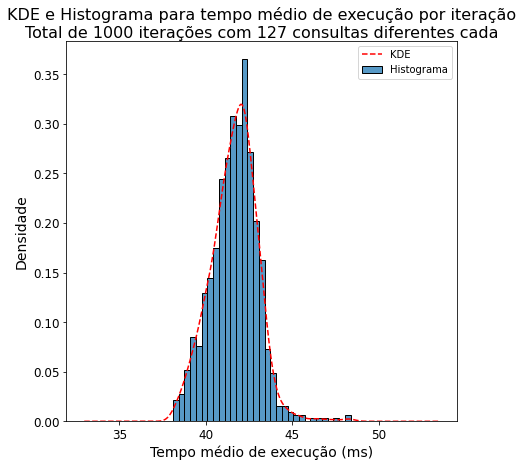

In [21]:
plot_hist_kde(mean_list, filename)

/home/leothi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


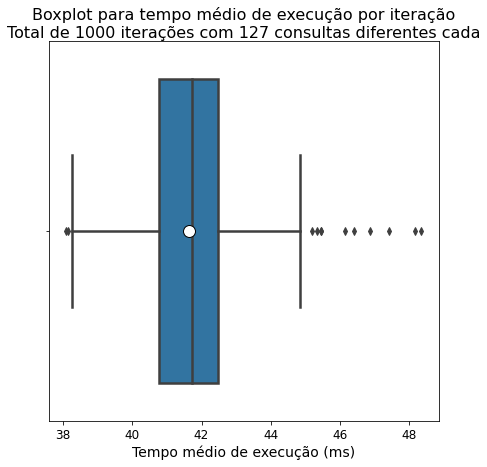

In [22]:
plot_boxplot(mean_list, filename)

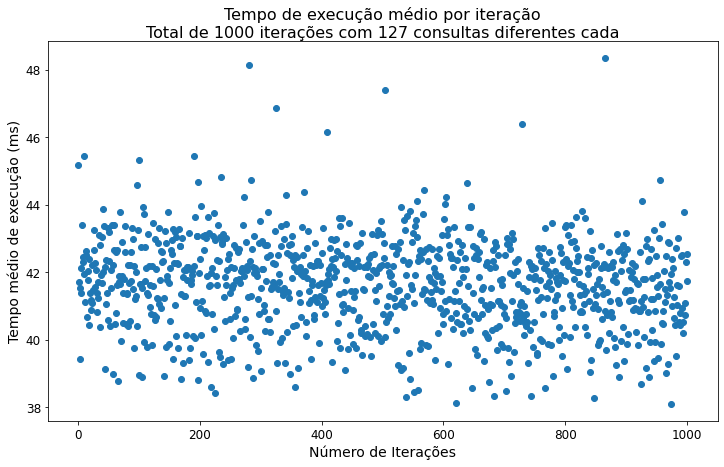

In [23]:
scatter_plot(mean_list, filename)